<a href="https://colab.research.google.com/github/hardikkamboj/Google-Earth-Engine-Notebooks/blob/main/USE_CASES/Analyzing_cyclone_winston/Analyzing_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# unzpipping the images from the folder 
!unzip data.zip

Archive:  data.zip
   creating: content/data/
  inflating: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160210.time.20160210T000000.tif  
  inflating: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160218.time.20160218T000000.tif  
  inflating: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160305.time.20160305T000000.tif  
  inflating: content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160226.time.20160226T000000.tif  


In [8]:
!pip install --quiet earthpy
!pip install --quiet rioxarray 

In [16]:
!pip install --quiet rioxarray 

     |████████████████████████████████| 47 kB 3.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=f9883482643b40b2829637adcd8ab8b8d9a631f5f7e4d550a9decc7d721f8353
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [9]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import show

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'warn', 'under': 'ignore'}

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


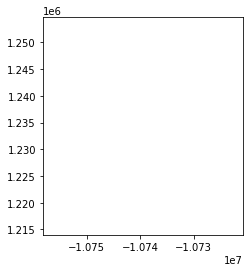

In [10]:
img1 = rio.open('/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160210.time.20160210T000000.tif')

show(img1)

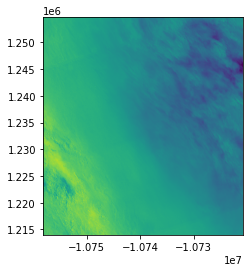

In [11]:
img2 = rio.open('/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160218.time.20160218T000000.tif')

show(img2)

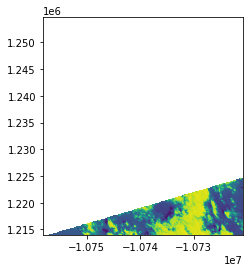

In [12]:
img3 = rio.open('/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160226.time.20160226T000000.tif')

show(img3)

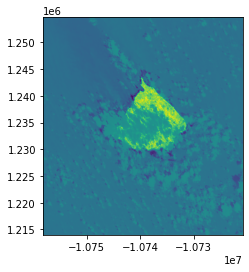

In [13]:
img4 = rio.open('/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160305.time.20160305T000000.tif')

show(img4)

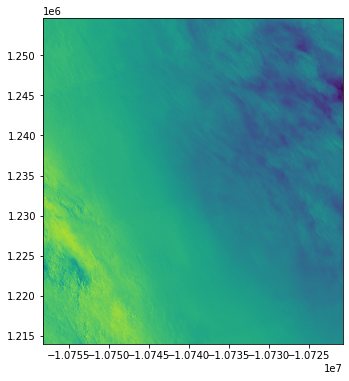

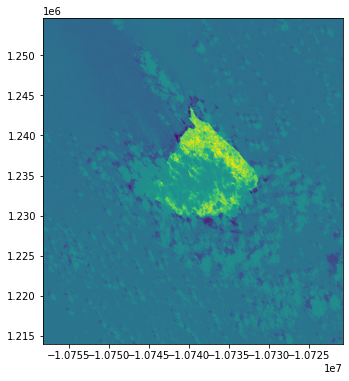

In [14]:
plt.figure(figsize = (8,6))
show(img2)

plt.figure(figsize= (8,6))
show(img4)

## Calculating NDVI

In [26]:
naip_data = rxr.open_rasterio('/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160218.time.20160218T000000.tif')

In [27]:
naip_data.shape


(1, 407, 374)

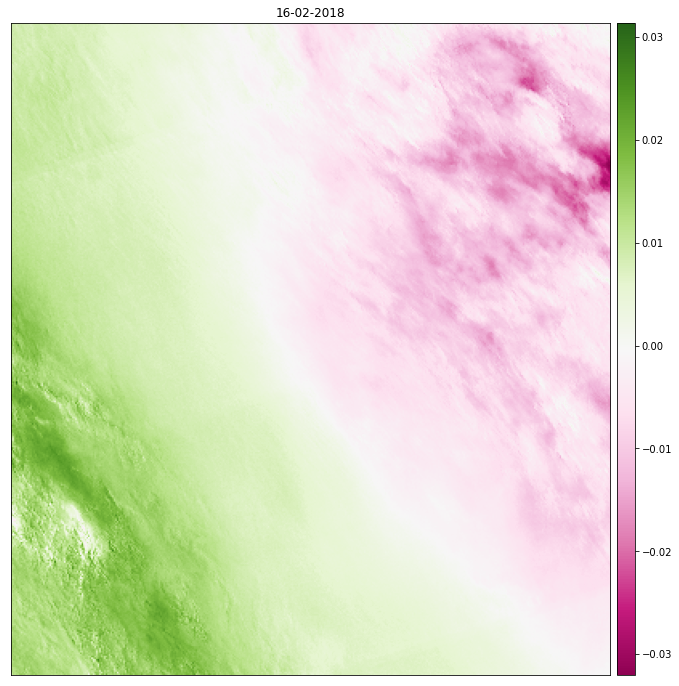

In [28]:
ep.plot_bands(naip_data,
              cmap='PiYG',
              scale=False,
              title="16-02-2018")
plt.show()

In [29]:
path4 = '/content/content/data/wx_LANDSAT_LC08_C01_T1_8DAY_NDVI_20160305.time.20160305T000000.tif'

naip_data2 = rxr.open_rasterio(path4)

In [30]:
naip_data2.shape


(1, 407, 374)

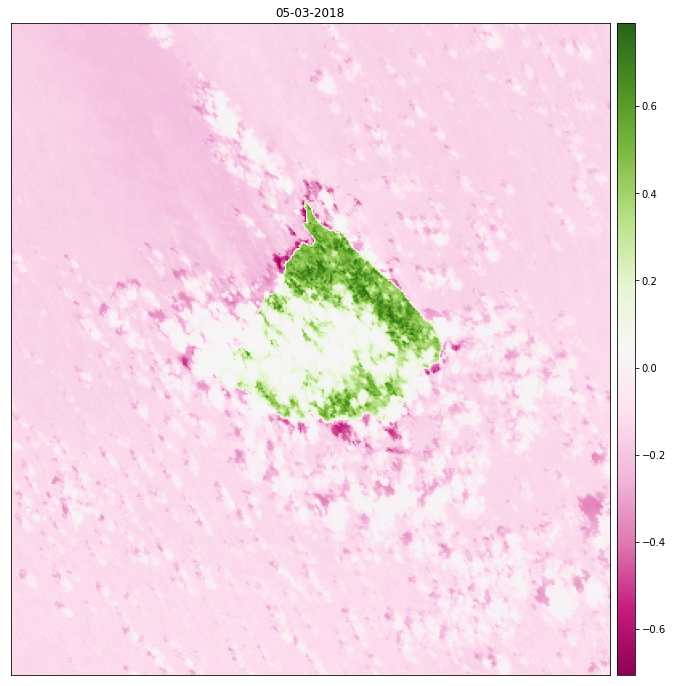

In [32]:
ep.plot_bands(naip_data2,
              cmap='PiYG',
              scale=False,
              title="05-03-2018")
plt.show()

## Change in NDVI per pixel 
Here I am taking the difference between the numpy arrays

In [33]:
diff = naip_data2 - naip_data

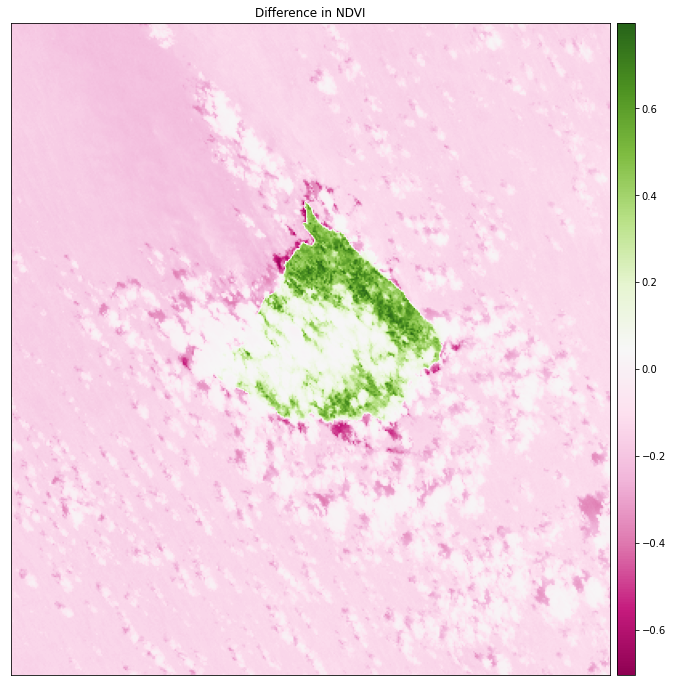

In [34]:
ep.plot_bands(diff,
              cmap='PiYG',
              scale=False,
              title="Difference in NDVI")
plt.show()